In [12]:
#We import the data to check if the velocity profiles are correct
#Be aware, some of the stuff depends on the fact that we have 20000 disk, 10000 bulge and 40000 halo particles
#This mostly where I would use 800 particles to go over multiple and N to displace to get to the bulge or halo

from amuse.lab import *
import inspect
import sys
import os
import numpy as np
import random,math
#finds script path
filename = inspect.getframeinfo(inspect.currentframe()).filename
SCRIPT_PATH = os.path.dirname(os.path.abspath(filename))
Galaxy_path = SCRIPT_PATH + '/mw_test_29-10'
MW = read_set_from_file(Galaxy_path, "hdf5")

In [13]:
print(Galaxy_path)    #Quick check to see what the dataset looks like
print(MW[52000])

/home/davey/AMUSE/mw_test_29-10
Particle(4627422859763807843, set=<2849250296>
    , mass=5.84514576732e+40 kg
    , vx=699172.126067 m * s**-1
    , vy=-362530.446686 m * s**-1
    , vz=619570.106493 m * s**-1
    , x=-4.76395260131e+21 m
    , y=2.97153568371e+21 m
    , z=2.46806494361e+21 m)


In [389]:
print(np.sum(MW.mass).in_(units.MSun))   #Check total mass, should be around 1.5e12 MSun

1.17678898408e+15 MSun


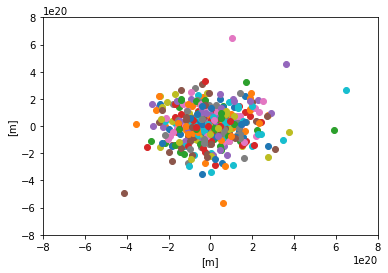

In [383]:
from amuse.plot import plot,scatter   #We can use this to check if the particles are distributed fine (is bulge round, is disk flat etc.)
import matplotlib.pyplot as plt
for j in range(400):
    plt.xlim(-8e20,8e20)
    plt.ylim(-8e20,8e20)
    scatter(MW[2000+j].position[0], MW[2000+j].position[1])   #The constant here changes what particle set we are considering, 0 and 1 represent x and y (2 = z)

In [75]:
print(MW[22000:22200])  #I used this to check if these were bulge particles

                 key         mass           vx           vy           vz            x            y            z
                   -           kg    m * s**-1    m * s**-1    m * s**-1            m            m            m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 3703964657047596351    1.553e+38   -6.461e+05    3.937e+05    1.461e+06   -8.157e+18    2.568e+19   -6.794e+18
 3140839045784932211    1.553e+38   -9.435e+05    8.382e+03    3.006e+05    6.259e+19    9.887e+18   -4.552e+18
18442341612597687915    1.553e+38    2.319e+05    3.278e+05    3.568e+05   -2.177e+19   -6.267e+18   -2.441e+19
 4364632557388682447    1.553e+38   -5.532e+03    7.647e+05   -1.098e+06    2.751e+18   -6.305e+18   -1.961e+19
 7915312893974303392    1.553e+38   -1.131e+06   -1.111e+06   -1.298e+06   -1.904e+19    1.320e+19    1.104e+19
15049158574996863046    1.553e+38    1.500e+05   -6.492e+04    3.831e+05   -2.765e+18   -6.393e+18   -2.

In [384]:
#This stuff was to see what was happening, it seemed like the z velocity was way too big but better analysis is done further in the notebook


#k=0
#for i in range(2000):
    #k += abs(MW[22000+i].velocity[1]/MW[22000+i].velocity[0])   #Bulge
    
#print(k/2000)

In [385]:
#k=0
#for i in range(2000):
    #k += abs(MW[5000+i].velocity[2]/MW[5000+i].velocity[0])    #Disk
    
#print(k/2000)

In [386]:
#We make an attempt at finding radial, angular and tangential velocity



#The idea now is to find the unit vectors, we define the 3 unit vectors 
# r^ = sin t * cos p x^ + sin t sin p y^ + cos t z^
# p^ = -sin p x^ + cos p y^
# t^ = cos t * cos p x^ + cos t sin p y^ -sin t z^
# r = math.sqrt(x**2 + y**2 + z**2)
# p = arctan(y/x) but we need to expand since this only gives -pi/2 to pi/2
# t = arctan(math.sqrt(x**2 + y**2)/z) this one does not need expanding since it only goes from 0 to pi anyways
#But we need to displace it by math.pi for negative z since atan goes from pi/2 to -pi/2 there (still works if we don't but this looks nicer)

#This here was some stuff just to test if it works
x=0.5
y=0.4
z = 0.9
if z < 0:
    print(math.atan(0.002/z)+math.pi)
else:
    print(math.atan(0.002/z))

#arctan only -pi/2 to pi/2, this codes gives us from -pi/2 to 3pi/2
if x < 0:
    angle = math.atan(y / x) + math.pi
else:
    angle = math.atan(y/x)
        
print(360*angle/(2*math.pi)) 


#So this is the idea that we are going to use

0.002222218564254094
38.659808254090095


In [390]:
CoM = MW.center_of_mass()  #So we don't have to call it multiple times

In [398]:
#Here we get the radial,ang, tang and total velocity components, we can change N to determine if we are doing this for bulge,disk or halo
unityv = 1 | units.m**-1 * units.s
unitym = 1 | units.m**-1
Distance = [] | units.kpc
Angularv = [] |units.km/units.s
Radialv = [] | units.km/units.s
Tangv = [] | units.km/units.s
Totalv = [] | units.km/units.s
N = 20100
for i in range(N, N+800):
    k = MW[i].position - CoM   #Displace since we are considering it with relation to the center of mass

    r = math.sqrt((k[0]**2 + k[1]**2 + k[2]**2)*unitym**2)
    if k[2] < 0 | units.m:
        theta = math.atan(math.sqrt((k[0]**2 + k[1]**2)*unitym**2)/(unitym*k[2]))+math.pi
    else:
        theta = math.atan(math.sqrt((k[0]**2 + k[1]**2)*unitym**2)/(unitym*k[2]))




    if k[0] < 0 | units.m:
        phi = math.atan(k[1]/k[0]) + math.pi
    else:
        phi = math.atan(k[1]/k[0])


    runit = (math.sin(theta)*math.cos(phi),math.sin(theta)*math.sin(phi),math.cos(theta))
    tunit = (math.cos(theta)*math.cos(phi),math.cos(theta)*math.sin(phi),-math.sin(theta))
    punit = (-math.sin(phi), math.cos(phi),0)
    
    
    
    Z1 = np.array([[runit[0],tunit[0],punit[0]], [runit[1],tunit[1],punit[1]], [runit[2],tunit[2],punit[2]]])
    Z2 = np.array([unityv*MW[i].velocity[0],unityv*MW[i].velocity[1],unityv*MW[i].velocity[2]])
    Velpolar = 1/1000 * np.linalg.solve(Z1, Z2)

    Distance.append(r | units.m)
    Angularv.append(Velpolar[2] | units.km/units.s)
    Radialv.append(Velpolar[0] | units.km/units.s)
    Tangv.append(Velpolar[1] | units.km/units.s)
    Totalv.append(math.sqrt(unityv**2*(MW[i].velocity[0]**2+MW[i].velocity[1]**2 + MW[i].velocity[2]**2))*1/1000  | units.km/units.s)
#I did this for a quick check of the results   
print(r)
print(theta)
print(phi)
print(runit)
print(tunit)
print(punit)


#Take note however that for an x-y galaxy these angular and tangential velocites work fine, 
#but for one that has rotated and merging, it might not be that good.
#We might consider defining a common plane however this gets complicated, another possibility is to disregard
#the tangential velocity for these galaxies and define the angular velocity along the unit vector such that
#The velocity component is made through the radial unit and angular unit vectors (so tang component is 0)


6.25233943488044e+19
1.4579861971572752
4.236582331521804
(-0.4551440981853878, -0.8832732407214672, 0.11257100920044721)
(-0.051563786258321476, -0.10006701783861309, -0.9936436825580852)
(0.8889235208012646, -0.45805564527280285, 0)


In [249]:
#v_pos = a*runit + b*tunit + c*punit
# Using a lin equation solver we get:

#Z1 = np.array([[runit[0],tunit[0],punit[0]], [runit[1],tunit[1],punit[1]], [runit[2],tunit[2],punit[2]]])
#Z2 = np.array([unityv*MW[i].velocity[0],unityv*MW[i].velocity[1],unityv*MW[i].velocity[2]])
#Velpolar = np.linalg.solve(Z1, Z2)
#print(1/1000 * Velpolar | units.km/units.s)
#np.allclose(np.dot(Z1, Velpolar), Z2)

#This was just me trying to get the linear solver to work

[540.347358765, 257.2881043, 825.331157021] km / s


True

In [318]:

#Some simple velocity profiles with their averages, might be a good idea to add variance aswell


100

320.221753909 kms


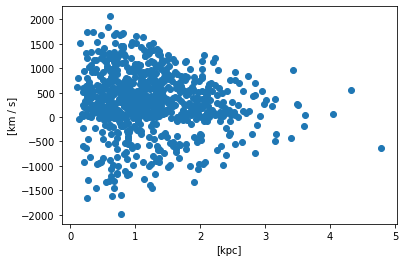

In [399]:
scatter(Distance,Angularv)
print(np.sum(Angularv/len(Distance)).in_(units.kms))

-6.84236757715 kms


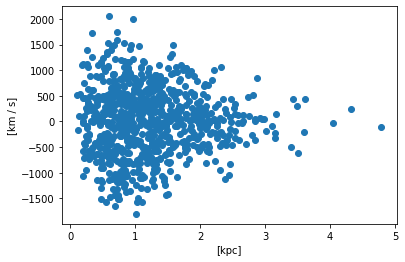

In [400]:
scatter(Distance,Radialv)
print(np.sum(Radialv/len(Distance)).in_(units.kms))

-14.560408872 kms


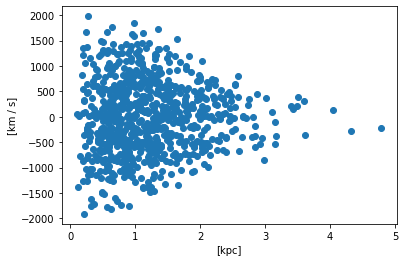

In [401]:
scatter(Distance,Tangv)
print(np.sum(Tangv/len(Distance)).in_(units.kms))

1116.64263414 kms


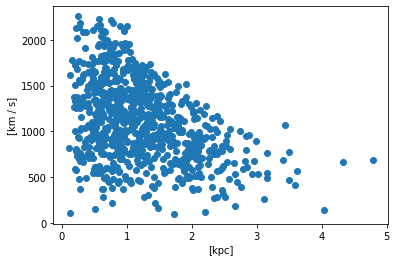

In [402]:
scatter(Distance,Totalv)
print(np.sum(Totalv/len(Distance)).in_(units.kms))